In [1]:
#2018ICT79
import pandas as pd
import numpy as np
df=pd.read_csv("pulsar-stars.csv")


In [2]:
df.head()

Mean of the integrated profile  \
0                       140.562500   
1                       102.507812   
2                       103.015625   
3                       136.750000   
4                        88.726562   

    Standard deviation of the integrated profile  \
0                                      55.683782   
1                                      58.882430   
2                                      39.341649   
3                                      57.178449   
4                                      40.672225   

    Excess kurtosis of the integrated profile  \
0                                   -0.234571   
1                                    0.465318   
2                                    0.323328   
3                                   -0.068415   
4                                    0.600866   

    Skewness of the integrated profile   Mean of the DM-SNR curve  \
0                            -0.699648                   3.199833   
1                            -0.515088                   1.677258   
2                             1.051164                   3.121237   
3                            -0.636238                   3.642977   
4                             1.123492                   1.178930   

    Standard deviation of the DM-SNR curve  \
0                                19.110426   
1                                14.860146   
2                                21.744669   
3                                20.959280   
4                                11.468720   

    Excess kurtosis of the DM-SNR curve   Skewness of the DM-SNR curve  \
0                              7.975532                      74.242225   
1                             10.576487                     127.393580   
2                              7.735822                      63.171909   
3                              6.896499                      53.593661   
4                             14.269573                     252.567306   

   target_class  
0             0  
1             0  
2             0  
3             0  
4             0

In [3]:
df.shape

(17898, 9)

In [4]:
X=df.drop('target_class',axis=1)
y=df.target_class

In [5]:
distribution_of_the_target_class=y.value_counts()
distribution_of_the_target_class

target_class
0    16259
1     1639
Name: count, dtype: int64

In [6]:
df.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

<Figure size 800x900 with 0 Axes>

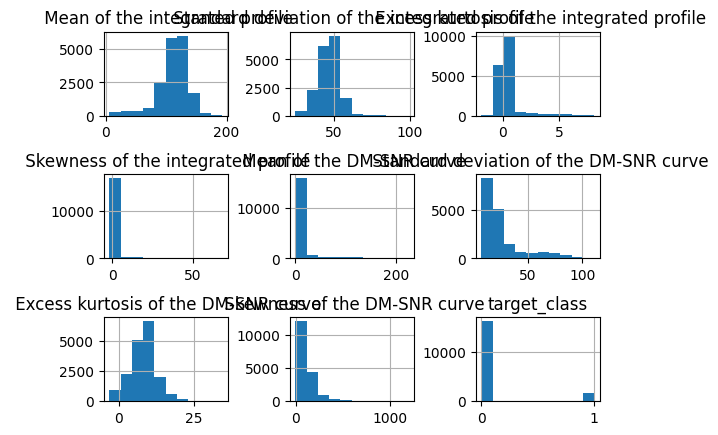

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,9))
df.hist();
plt.subplots_adjust(hspace=0.7,wspace=0.5)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=4)

In [9]:
from sklearn import svm
model=svm.SVC(kernel='rbf')

In [10]:
model.fit(X_train,y_train)
predicted_value=model.predict(X_test)

In [11]:
from sklearn.metrics import f1_score
print(f"Accuracy of the model is :{f1_score(y_test,predicted_value,average='weighted'):.2f}")

Accuracy of the model is :0.97


In [12]:
model1=svm.SVC(kernel='rbf',C=100)
model2=svm.SVC(kernel='rbf',C=1000)

model3=svm.SVC(kernel='linear',C=1.0)
model4=svm.SVC(kernel='linear',C=100.0)
model5=svm.SVC(kernel='linear',C=1000.0)

model6=svm.SVC(kernel='poly',C=1.0)
model7=svm.SVC(kernel='poly',C=100.0)

model8=svm.SVC(kernel='sigmoid',C=1.0)
model9=svm.SVC(kernel='sigmoid',C=100)

In [13]:
models=[model1,model2,model3,model4,model5,model6,model7,model8,model9]
for model in models:
    model.fit(X_train,y_train)
    predict=model.predict(X_test)
    print(f"Accuracy of the model {model} is: {f1_score(y_test,predict,average='weighted'):.3f}")

Accuracy of the model SVC(C=100) is: 0.979
Accuracy of the model SVC(C=1000) is: 0.981
Accuracy of the model SVC(kernel='linear') is: 0.980
Accuracy of the model SVC(C=100.0, kernel='linear') is: 0.980
Accuracy of the model SVC(C=1000.0, kernel='linear') is: 0.980
Accuracy of the model SVC(kernel='poly') is: 0.972
Accuracy of the model SVC(C=100.0, kernel='poly') is: 0.977
Accuracy of the model SVC(kernel='sigmoid') is: 0.922
Accuracy of the model SVC(C=100, kernel='sigmoid') is: 0.919
